TASK 3

1. Data Loading and Initial Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('cancer patient data sets.csv')

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types and null values:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

Dataset shape: (1000, 26)

First 5 rows:
   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness o

2. Exploratory Data Analysis (EDA) and Data Wrangling

Missing values:
 index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


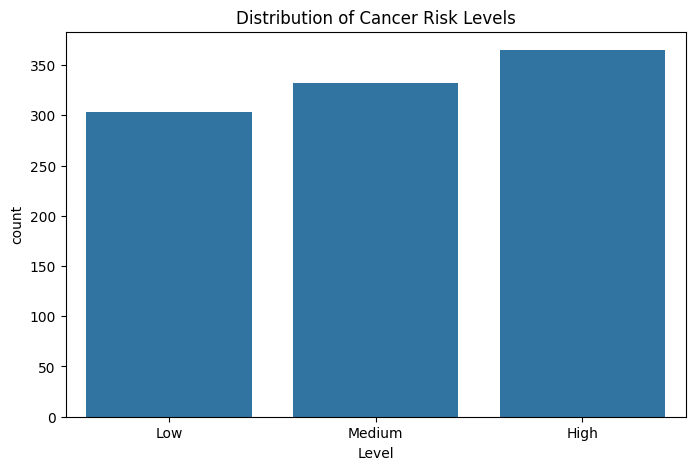

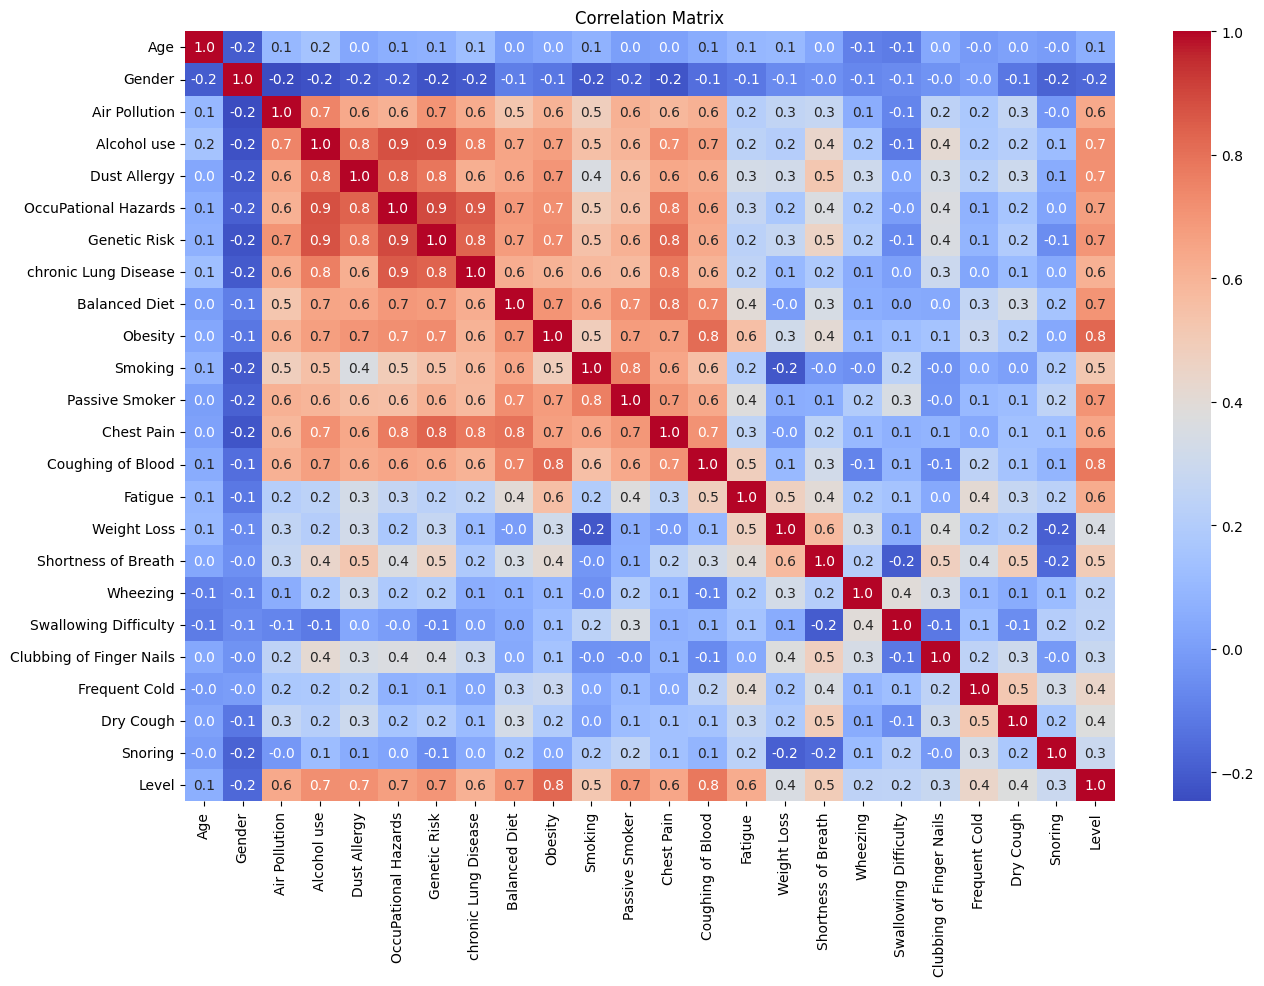

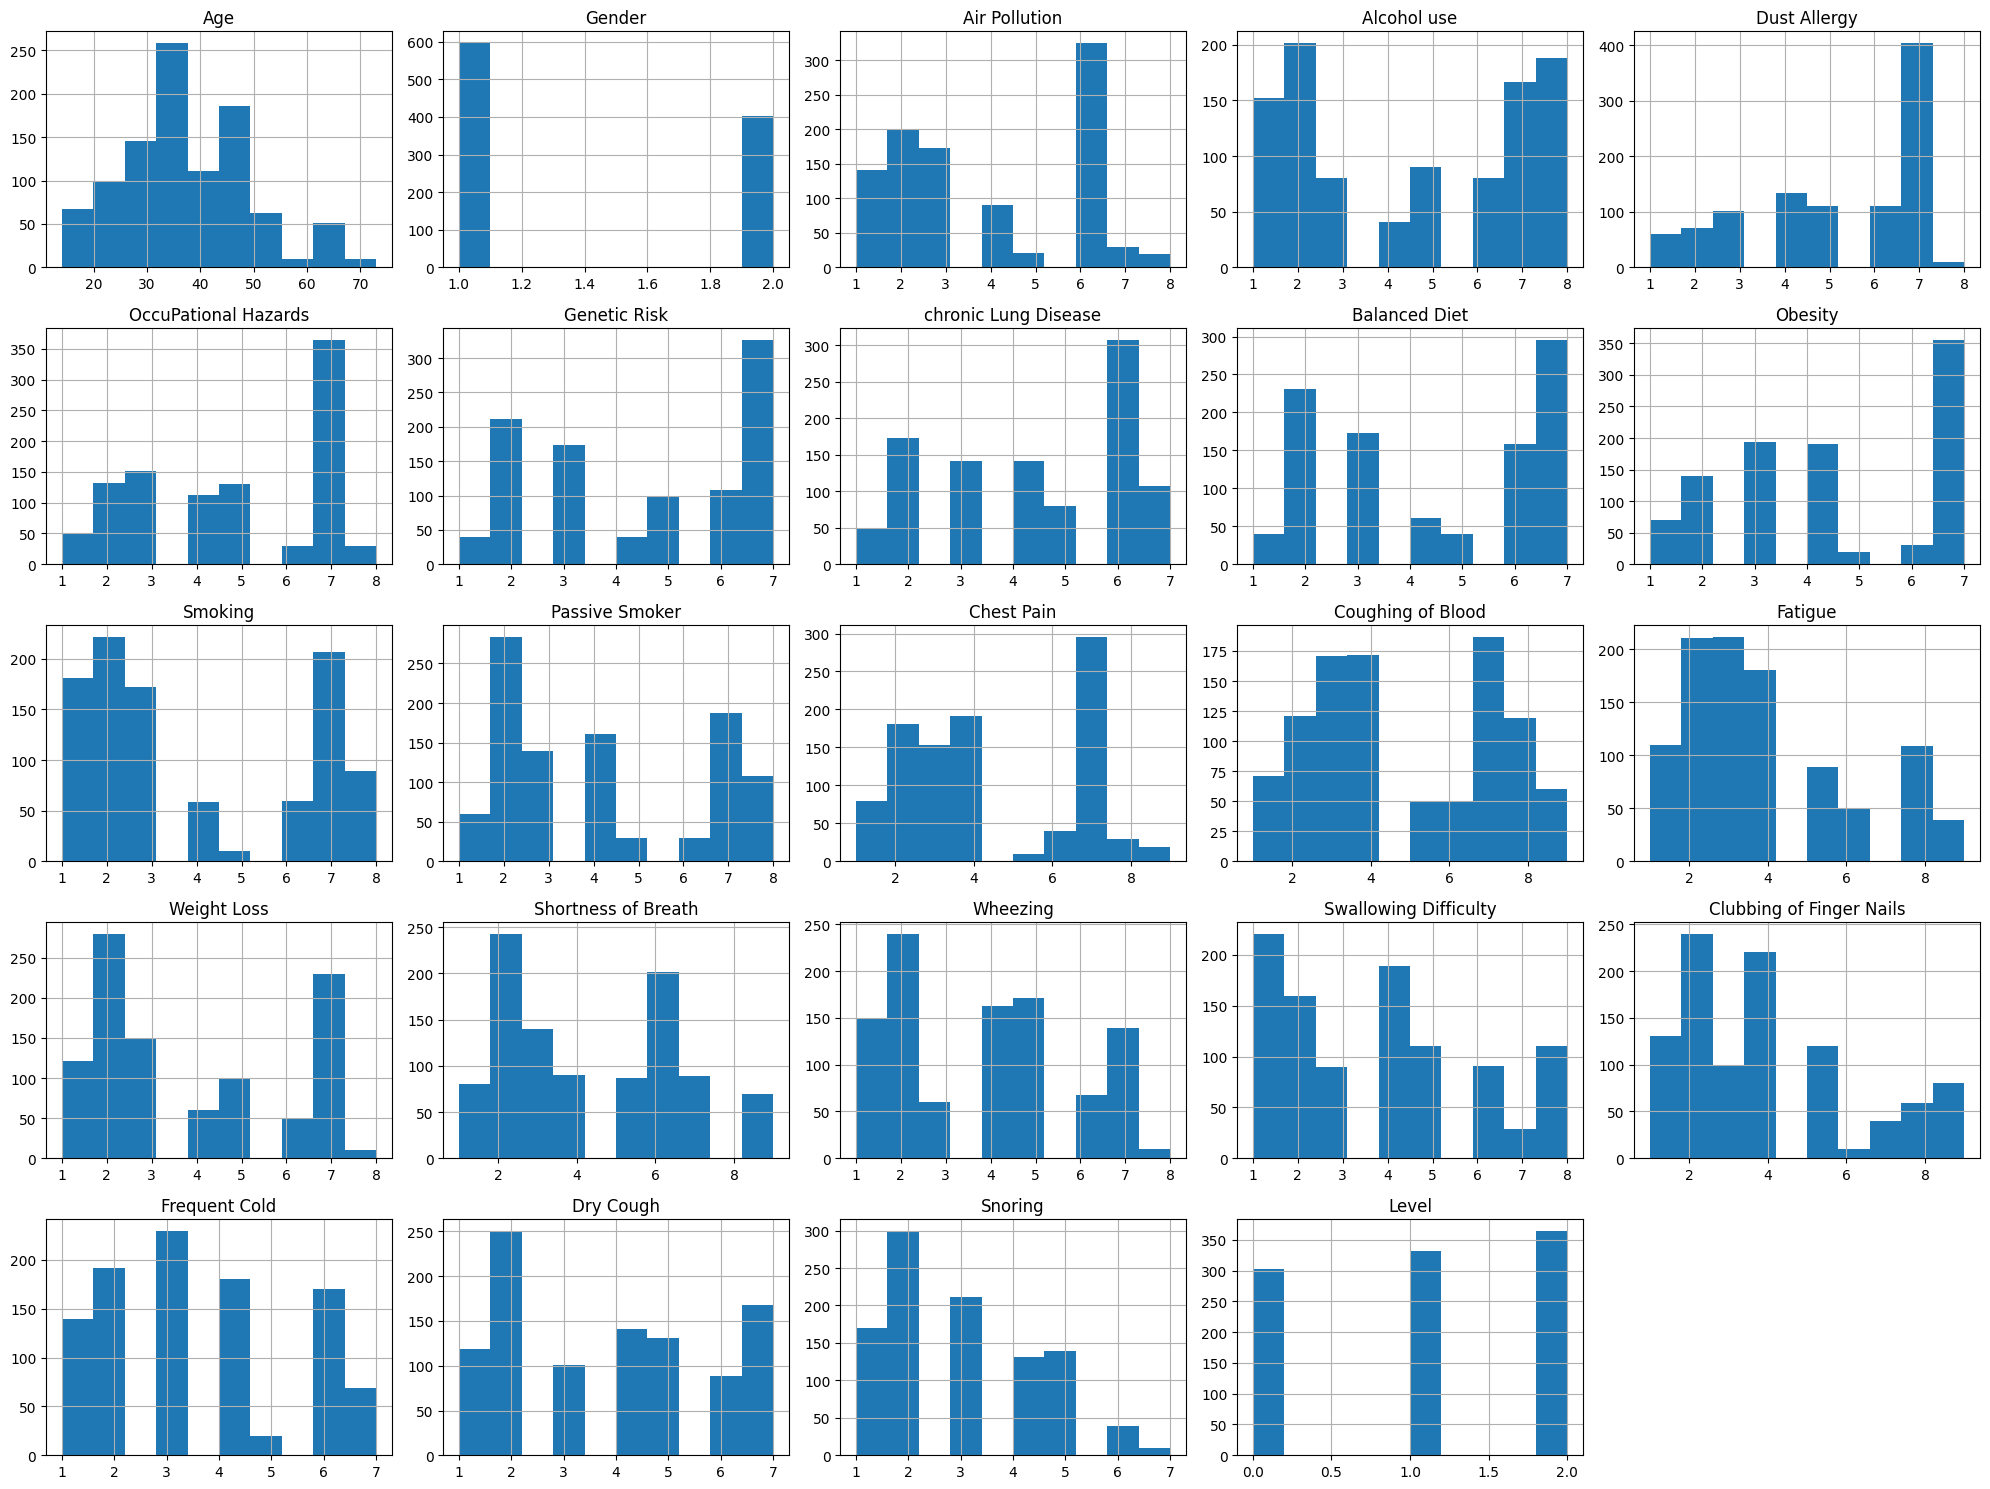

In [2]:
print("Missing values:\n", df.isnull().sum())

# distribution of the target variable 'Level'
plt.figure(figsize=(8, 5))
sns.countplot(x='Level', data=df)
plt.title('Distribution of Cancer Risk Levels')
plt.show()

df['Level'] = df['Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

df = df.drop(['index', 'Patient Id'], axis=1)

# correlation matrix
plt.figure(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# feature distributions
df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

3. Data Preprocessing

In [4]:
# splitting data into features and target
X = df.drop('Level', axis=1)
y = df['Level']

# splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# standardizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4. Model Implementation and Evaluation

Logistic Regression Results:
Accuracy: 1.0

Confusion Matrix:
 [[ 91   0   0]
 [  0 100   0]
 [  0   0 109]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       109

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



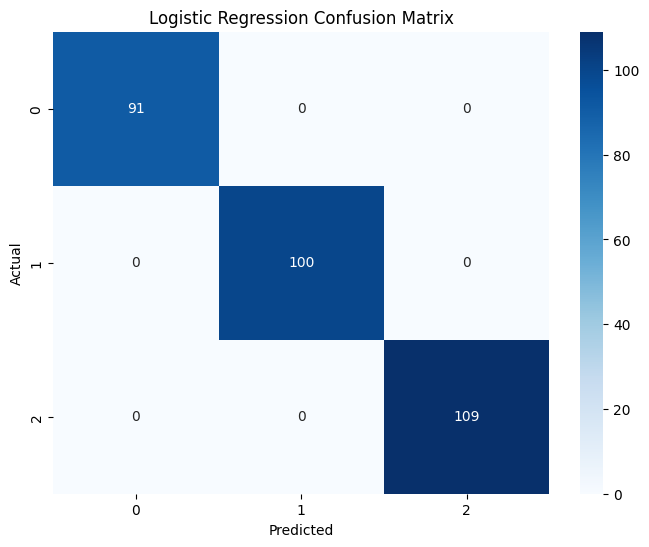

In [6]:
# logistic Regression
lr = LogisticRegression(solver='lbfgs', max_iter=1000)  # <-- removed multi_class
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Naive Bayes Results:
Accuracy: 0.9

Confusion Matrix:
 [[ 82   9   0]
 [  0  82  18]
 [  0   3 106]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        91
           1       0.87      0.82      0.85       100
           2       0.85      0.97      0.91       109

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



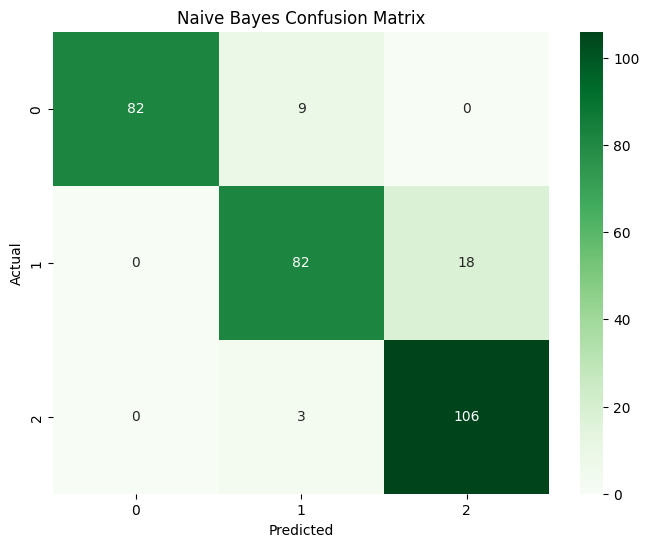

In [7]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

print("Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Greens')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Results:
Accuracy: 1.0

Confusion Matrix:
 [[ 91   0   0]
 [  0 100   0]
 [  0   0 109]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       109

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



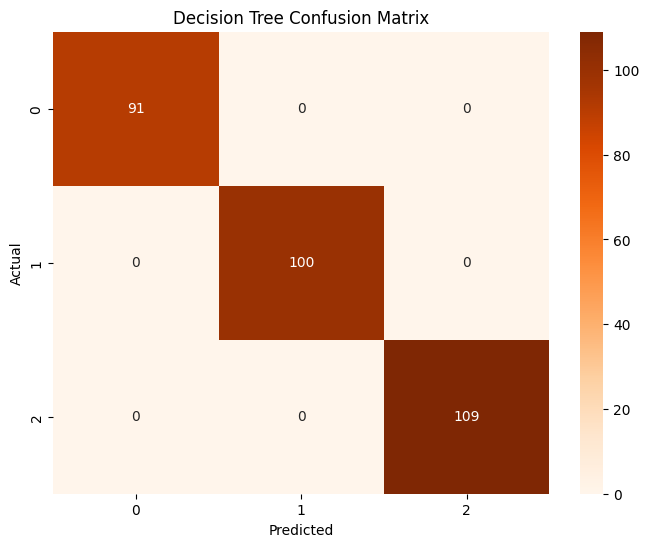

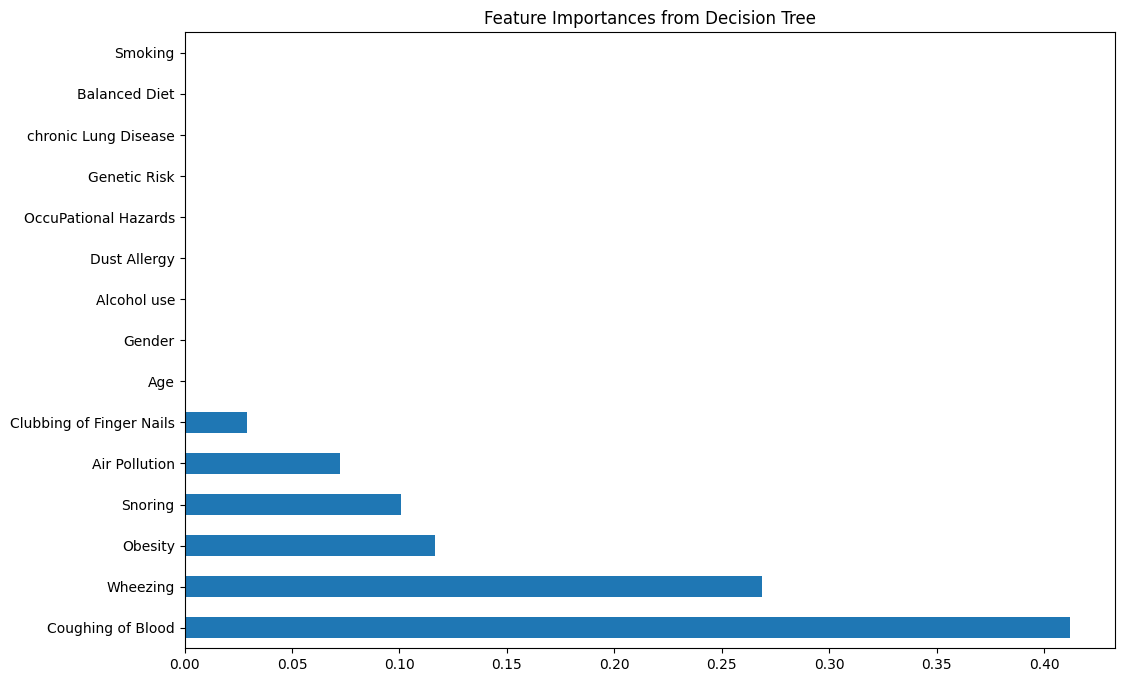

In [8]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# feature importance
plt.figure(figsize=(12, 8))
feature_importances = pd.Series(dt.feature_importances_, index=X.columns)
feature_importances.nlargest(15).plot(kind='barh')
plt.title('Feature Importances from Decision Tree')
plt.show()

5. Model Comparison

<ipython-input-9-82e8182a9659>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


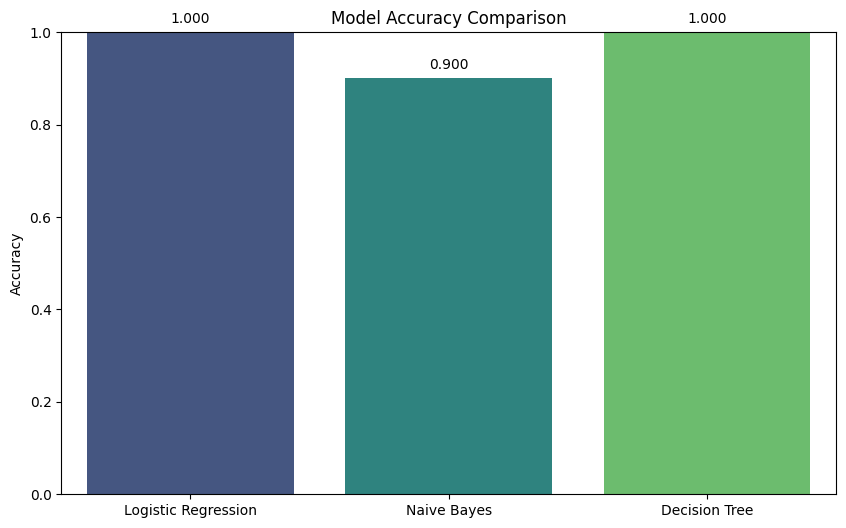

In [9]:
models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree']
accuracies = [accuracy_score(y_test, y_pred_lr),
              accuracy_score(y_test, y_pred_nb),
              accuracy_score(y_test, y_pred_dt)]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')
plt.show()

6. ROC Curve (for Logistic Regression - multiclass adaptation)

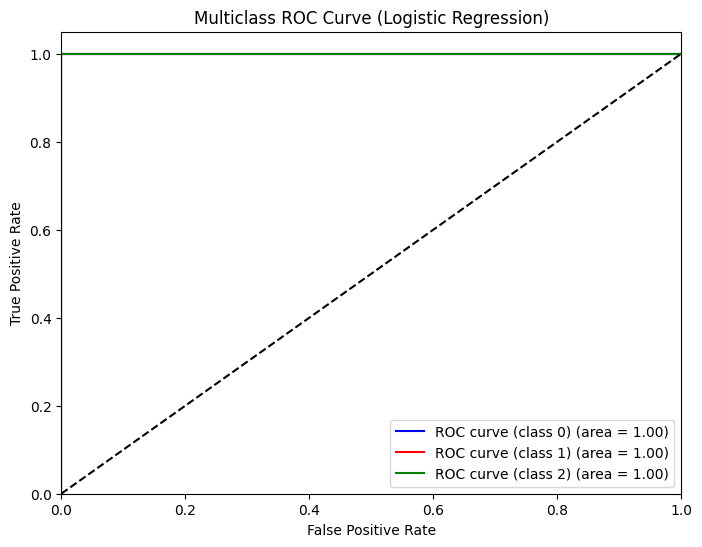

In [11]:
# class probabilities for Logistic Regression
y_prob_lr = lr.predict_proba(X_test_scaled)

# ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob_lr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()